In [6]:
import matplotlib.pyplot as plt
from utils import *

# Exercicio
## Função Sigmoid
### Implementação 1
Implementação utilizando *Python Standard Library*

In [7]:
# Biblioteca padrão de funções matemáticas
import math

def sigmoid1(z):
    '''Função retorna sigmoid(z) sendo z um número.
    '''
    return 1 / (1 + math.exp(-z))

In [8]:
# Teste
sigmoid1(10)

0.9999546021312976

In [9]:
def sigmoid_list(z_list):
    '''Função retorna um array com sigmoid(z) para z definidos em z_list
    '''
    rsp = []
    for z in z_list:
        rsp.append(sigmoid1(z))
    # Se quiser pode implementar com List Comprehension
    # rsp = [sigmoid(z) for z in z_list]
    return rsp

In [10]:
# Teste
sigmoid_list([-10, 0, 10])

[4.5397868702434395e-05, 0.5, 0.9999546021312976]

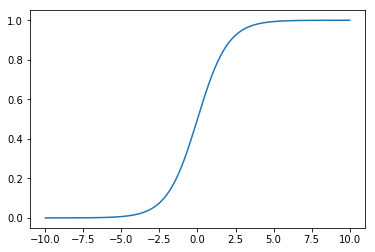

In [11]:
xaxis = [-10 + 0.001 * x for x in range(0, 20001)]
yaxis = sigmoid_list(xaxis)
plt.plot(xaxis, yaxis)

### Implementação 2
Utilizando numpy array

In [12]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [13]:
xaxis = np.array([-10, 0, 10])
xaxis

array([-10,   0,  10])

In [14]:
sigmoid(xaxis)

array([4.53978687e-05, 5.00000000e-01, 9.99954602e-01])

In [15]:
xaxis = np.arange(-10, 10.001, 0.001)
xaxis

array([-10.   ,  -9.999,  -9.998, ...,   9.998,   9.999,  10.   ])

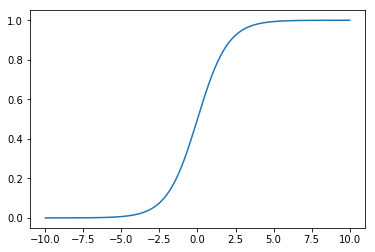

In [16]:
yaxis = sigmoid(xaxis)

plt.plot(xaxis, yaxis)

## Previsão
### Implementação 1
Implementação utilizando *Python Standard Library*

In [17]:
def calc_z1(weights, bias, xs):
    '''
    Retorna valor de z para w*x + bias.
    weights -> list de tamanho n
    xs -> list de variaveis independentes para tamanho n
    bias -> float
    '''
    n = len(weights)
    z = bias
    for i in range(n):
        z += weights[i] * xs[i]
    return z

In [18]:
weights = [0.1124579, 0.23106775]
bias = -0.3
xs = [1, 1.2]
calc_z1(weights, bias, xs)

0.08973919999999996

In [19]:
def calc_z_list(weights, bias, xs_list):
    '''
    Retorna valores de z em um list
    weights -> list de tamanho n
    xs_list -> list de list de variaveis independentes tamanho m
    bias -> float
    '''
    z_list = []
    for xs in xs_list:
        z_list.append(calc_z1(weights, bias, xs))
    # Da pra fazer com List Comprehension
    # z_list = [calc_z1(weights, bias, xs) for xs in xs_list]
    return z_list

In [20]:
weights = [0.1124579, 0.23106775]
bias = -0.3
xs_list = [[ 1,   1.2],
           [-1.1, 2.],
           [-3.2, 0.1]]

calc_z_list(weights, bias, xs_list)

[0.08973919999999996, 0.03843181000000001, -0.636758505]

In [21]:
def predict1(weights, bias, xs_list):
    '''
    Retorna a previsão de 0 e 1 para valores de x em xs_list
    '''
    z_list = calc_z_list(weights, bias, xs_list)
    y_list = sigmoid_list(z_list)
    prediction = []
    for y in y_list:
        if y > 0.5:
            prediction.append(1)
        else:
            prediction.append(0)
    return prediction
    

In [22]:
predict1(weights, bias, xs_list)

[1, 1, 0]

### Implementação 2
Usando numpy array

In [23]:
def calc_z(weights, bias, X):
    '''
    Retorna valor de z = weights.T * X + bias.
    weights -> numpy array de shape (dimensões) (n, 1)
    bias -> float, escalar
    X -> numpy array de shape (dimensão) (n, m)
    
    n -> número de features
    m -> número de exemplos
    '''
    return np.dot(weights.T, X) + bias

In [24]:
weights = np.array([[0.1124579],
                    [0.23106775]])
bias = -0.3

X = np.array([[1.,  -1.1, -3.2],
              [1.2,  2.,   0.1]])

calc_z(weights, bias, X)

array([[ 0.0897392 ,  0.03843181, -0.6367585 ]])

In [25]:
def predict(weights, bias, X):
    z = calc_z(weights, bias, X)
    prediction = sigmoid(z)
    prediction[prediction > 0.5] = 1
    prediction[prediction <= 0.5] = 0
    return prediction

In [26]:
predict(weights, bias, X)

array([[1., 1., 0.]])